              precision    recall  f1-score   support

        High       1.00      0.15      0.26        20
         Low       0.89      0.94      0.92      2674
      Medium       0.78      0.66      0.72       897

    accuracy                           0.87      3591
   macro avg       0.89      0.59      0.63      3591
weighted avg       0.87      0.87      0.86      3591



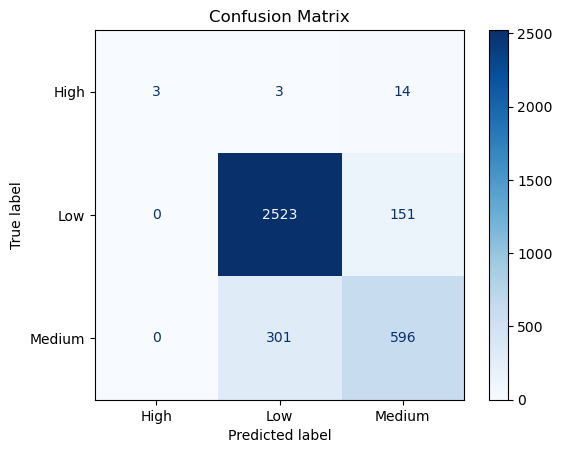

Mean Squared Error (Regression): 0.15993271521540922


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the data into a pandas DataFrame
data = pd.read_csv('fifa_players.csv')

# Select relevant features and target variable
features = ['age', 'height_cm', 'weight_kgs', 'crossing', 'finishing', 'short_passing', 
            'dribbling', 'ball_control', 'acceleration', 'sprint_speed']
target = 'overall_rating'

X = data[features]
y = data[target]

# Convert the continuous target variable into discrete classes (e.g., Low, Medium, High)
bins = [0, 70, 85, 100]
labels = ['Low', 'Medium', 'High']
y_binned = pd.cut(y, bins=bins, labels=labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# For completeness, here's the previous regression part with some additional plots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train.cat.codes)

# Make predictions on the test set
y_pred_reg = regression_model.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test.cat.codes, y_pred_reg)
print(f'Mean Squared Error (Regression): {mse}')

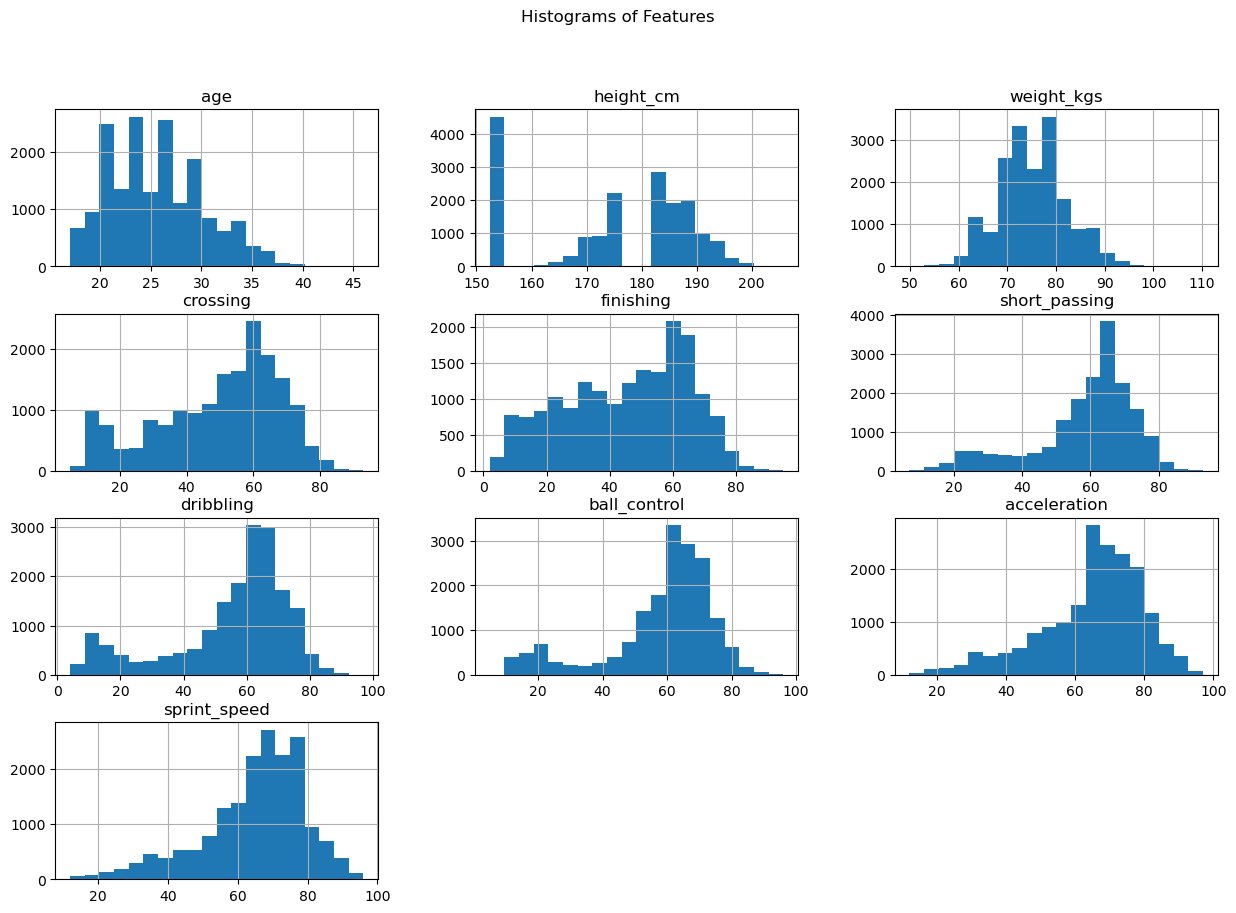

In [2]:
# Plotting
# 1. Histograms of the features
X.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

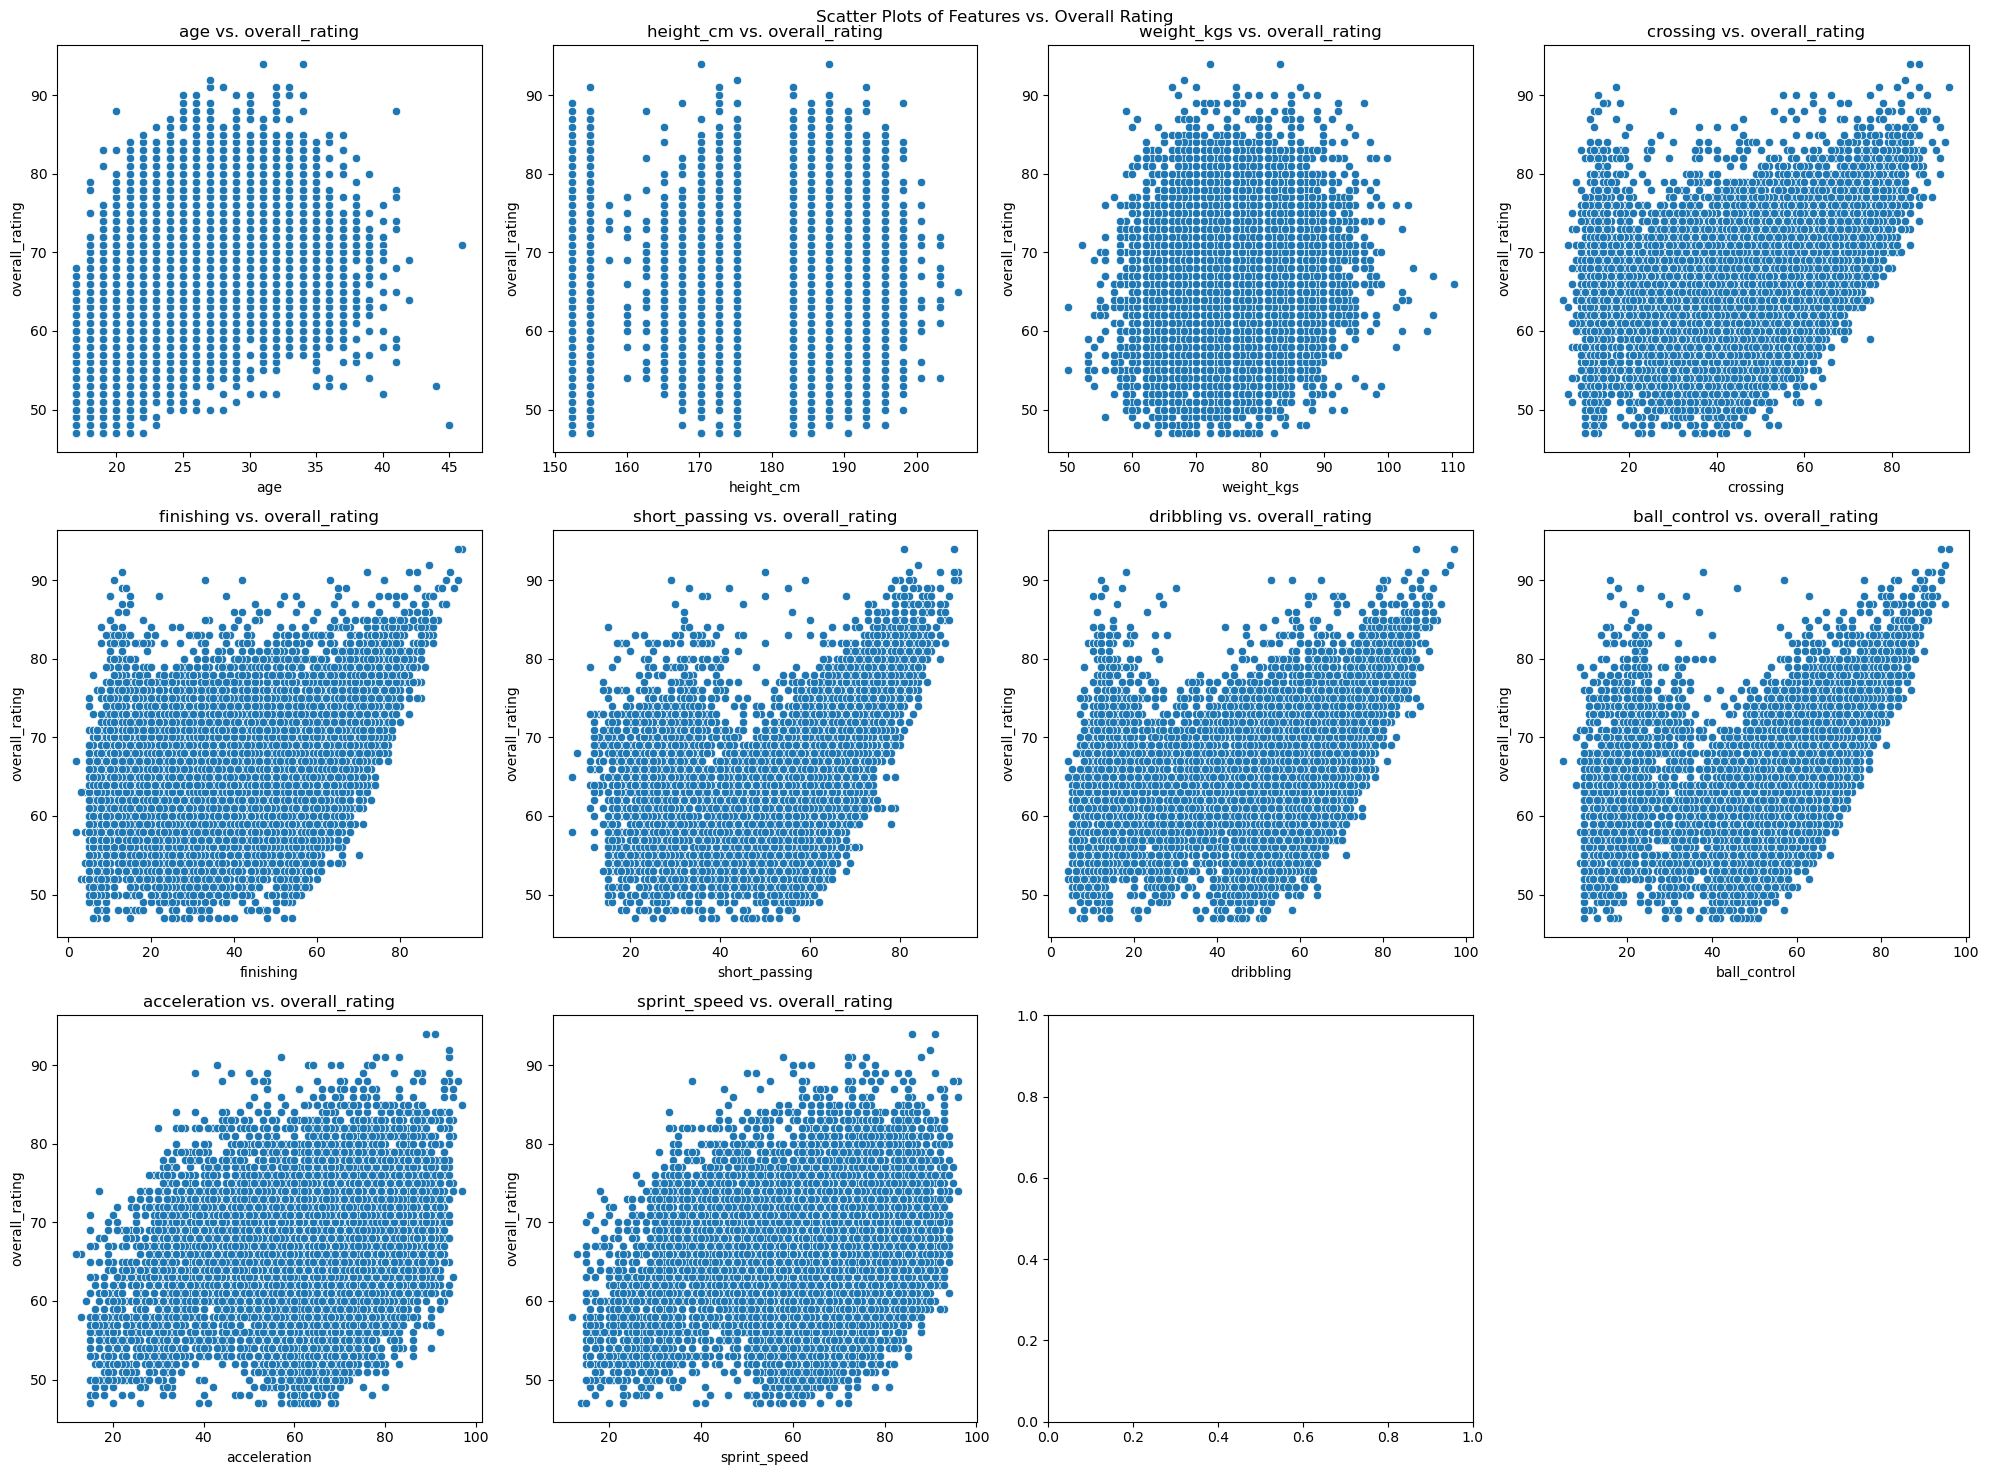

In [3]:
# 2. Scatter plots of features vs. target variable
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.suptitle('Scatter Plots of Features vs. Overall Rating')

for i, feature in enumerate(features):
    row, col = divmod(i, 4)
    sns.scatterplot(ax=axes[row, col], x=data[feature], y=data[target])
    axes[row, col].set_title(f'{feature} vs. {target}')

# Remove empty subplot
fig.delaxes(axes[2, 3])
plt.tight_layout()
plt.show()